In [42]:
# Install pip package in the current Jupyter kernel
# import sys
# !{sys.executable} -m pip install mplcyberpunk

In [70]:
import mplcyberpunk
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(192093894)

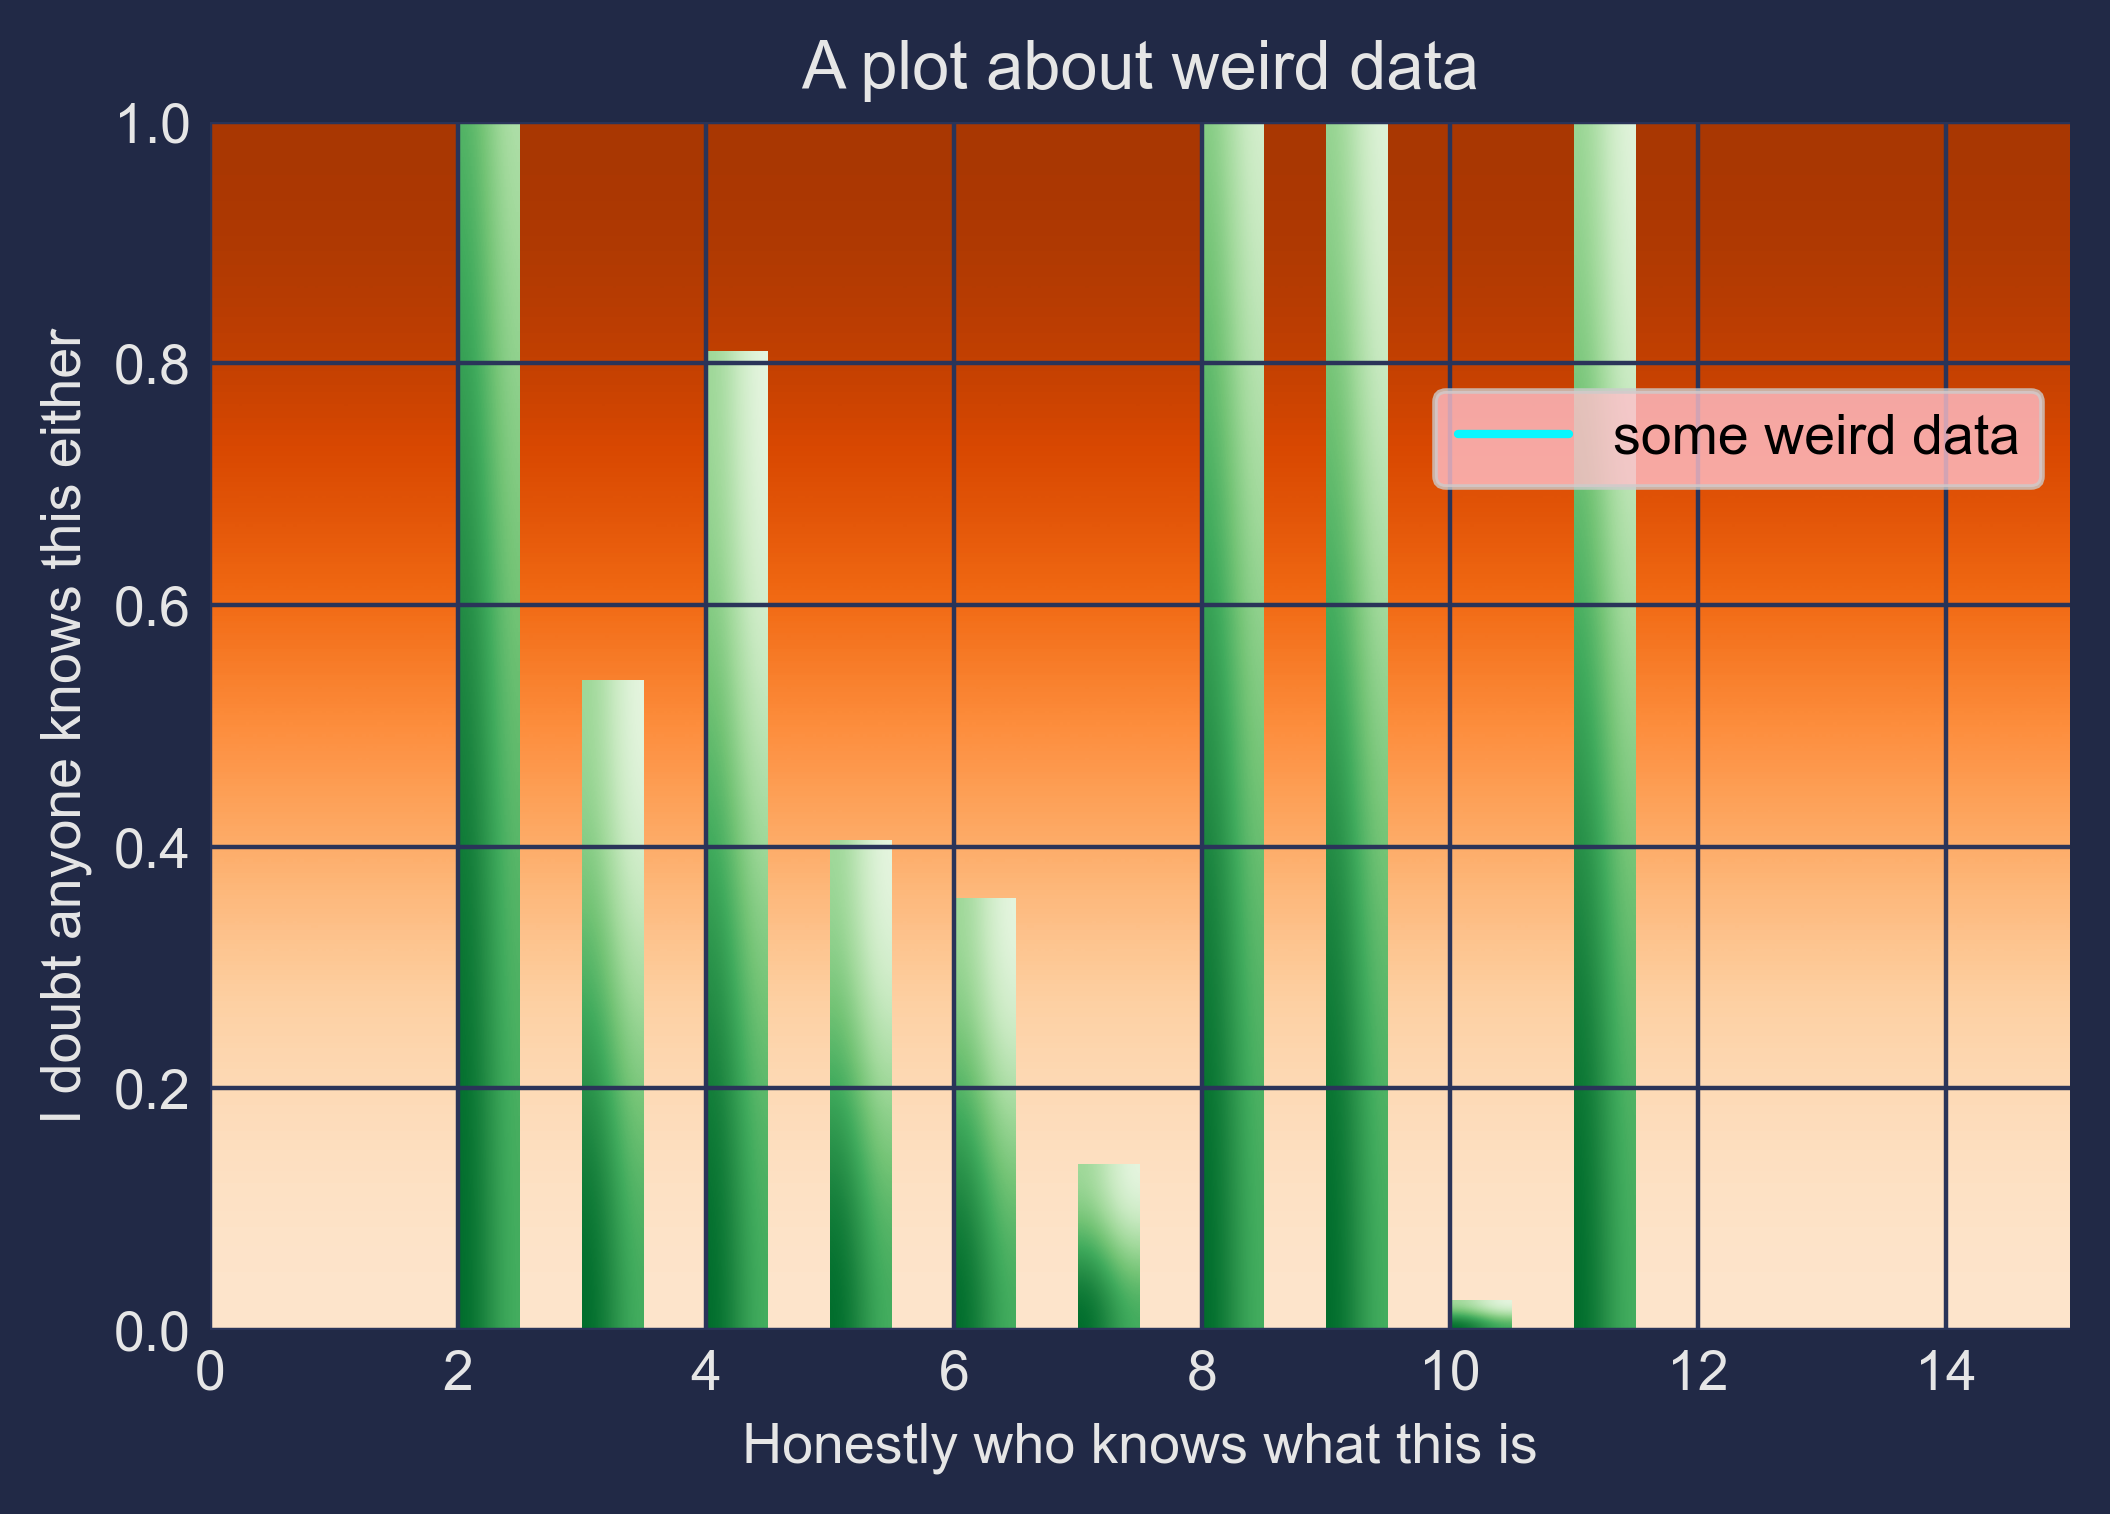

In [76]:

np.random.seed(24)
plt.style.use('cyberpunk')

def gradient_for_background(ax, extent, direction=0.3, cmap_range=(0, 1), **kwargs):
    
    phi = direction * np.pi / 2
    v = np.array([np.cos(phi), np.sin(phi)])
    X = np.array([[v @ [1, 0], v @ [1, 1]],
                  [v @ [0, 0], v @ [0, 1]]])
    a, b = cmap_range
    X = a + (b - a) / X.max() * X
    im = ax.imshow(X, extent=extent, interpolation='bicubic',
                   vmin=0, vmax=1, **kwargs)
    return im


def gradient_for_bars(ax, x, y, width=0.5, bottom=0):
    for left, top in zip(x, y):
        right = left + width
        gradient_image(ax, extent=(left, right, bottom, top),
                       cmap=plt.cm.Greens_r, cmap_range=(0.1, 0.9))


xmin, xmax = xlim = 0, 15
ymin, ymax = ylim = 0, 1

fig, ax = plt.subplots()
ax.set(xlim=xlim, ylim=ylim, autoscale_on=False)

# background image
gradient_for_background(ax, direction=0, extent=(0, 1, 0, 1), transform=ax.transAxes,
               cmap=plt.cm.Oranges, cmap_range=(0.1, 0.9))

N = 10
mu, sigma = 1, 0.6 # mean and standard deviation
x = np.arange(N) + 2
y = np.random.normal(mu,sigma,1000)

gradient_for_bars(ax, x,y, width=0.5)
ax.plot(x,label='some weird data')
ax.set_aspect('auto')
ax.set_xlabel('Honestly who knows what this is')
ax.set_ylabel('I doubt anyone knows this either')
ax.set_title('A plot about weird data')
leg = plt.legend(bbox_to_anchor=(1,0.8), fancybox=True, frameon= True, facecolor = 'pink' )
for text in leg.get_texts():
    plt.setp(text, color = 'black')
plt.rcParams['figure.dpi'] = 400
plt.show()
